# Machine Learning Foundation

## Course 3, Part a: Logistic Regression LAB


## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01) database, which was built from the recordings of study participants who carried a smartphone with an embedded inertial sensor while performing activities of daily living (ADL). The objective is to classify the activities the participants performed into one of the six following categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying.

The following information is provided for each record in the dataset:

*   Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration
*   Triaxial Angular velocity from the gyroscope
*   A 561-feature vector with time and frequency domain variables
*   The activity label

More information about the features are available on the website linked above.


In [1]:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

## Question 1

Import the data and do the following:

*   Examine the data types--there are many columns, so it might be wise to use value counts.
*   Determine if the floating point values need to be scaled.
*   Determine the breakdown of each activity.
*   Encode the activity label as an integer.


In [3]:
data = pd.read_csv("../data/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

In [4]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [5]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

In [6]:
data.dtypes.value_counts()

float64    561
object       1
Name: count, dtype: int64

In [7]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [8]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
Name: count, dtype: int64

In [9]:
data.iloc[:, :-1].max().value_counts()

1.0    561
Name: count, dtype: int64

Data is already scaled from -1.0 to 1.0 so it doesn't need to be normalised.

In [10]:
categorical_columns = [colname for colname in data.columns if data[colname].dtype == 'object']
categorical_columns

['Activity']

In [11]:
activity_value_counts = data['Activity'].value_counts()
activity_value_counts

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data['Activity'])
data['Activity'].value_counts()

Activity
0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: count, dtype: int64

## Question 2

*   Calculate the correlations between the dependent variables.
*   Create a histogram of the correlation values.
*   Identify those that are most correlated (either positively or negatively).


In [13]:
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

In [14]:
tril_index = np.tril_indices_from(corr_values)
tril_index

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

In [15]:
#TODO: optimise
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN

In [16]:
corr_values = (
    corr_values
    .stack()
    .to_frame()
    .reset_index()
    .rename(columns={'level_0': 'feature1',
                     'level_1': 'feature2',
                     0: 'correlation'})
)

corr_values['abs_correlation'] = corr_values['correlation'].abs()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

[Text(0.5, 0, 'Absolute Correlation'), Text(0, 0.5, 'Frequency')]

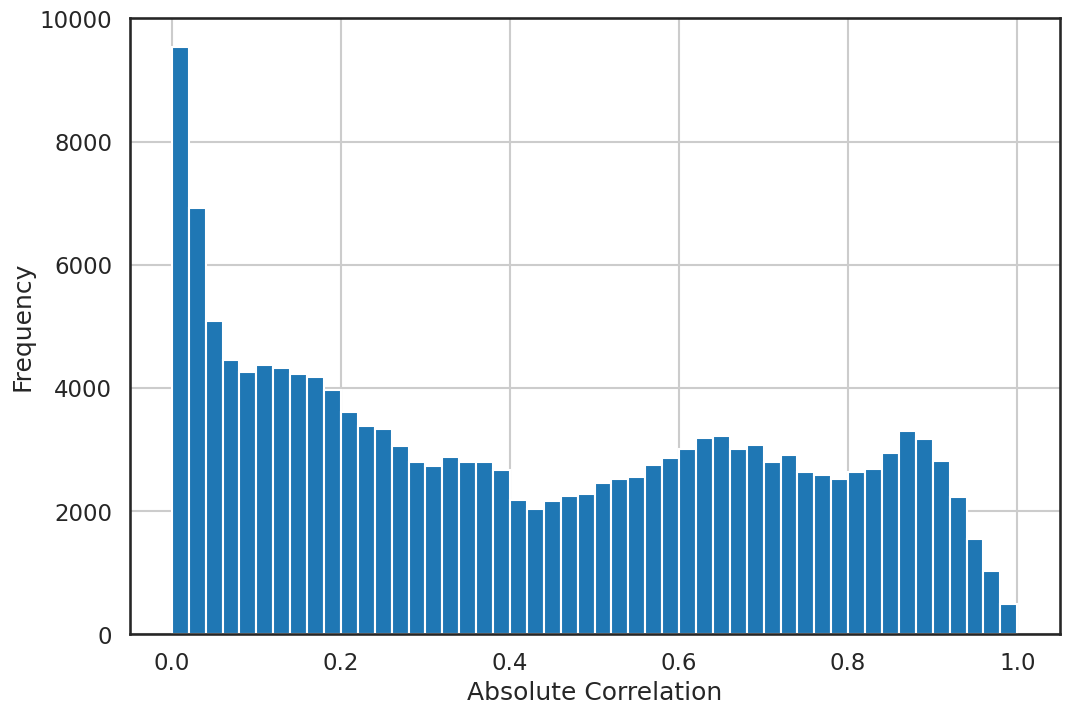

In [18]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values['abs_correlation'].hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency')

In [19]:
corr_values.sort_values('correlation', ascending=False)[corr_values['abs_correlation'] > 0.8]

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


## Question 3

*   Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
*   Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.


In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

In [21]:
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                          test_size=0.3,
                                          random_state=42)
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data['Activity']))
X_train, y_train = data.loc[train_idx, feature_cols], data.loc[train_idx, ['Activity']]
X_test, y_test = data.loc[test_idx, feature_cols], data.loc[test_idx, ['Activity']]

In [22]:
y_train.value_counts(normalize=True)

Activity
0           0.188792
2           0.185046
1           0.172562
3           0.167152
5           0.149951
4           0.136496
Name: proportion, dtype: float64

In [23]:
y_test.value_counts(normalize=True)

Activity
0           0.188673
2           0.185113
1           0.172492
3           0.167314
5           0.149838
4           0.136570
Name: proportion, dtype: float64

## Question 4

*   Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
*   Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.


In [24]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [25]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [27]:
lr_model_l1 = LogisticRegressionCV(cv=4,
                                   penalty='l1',
                                   n_jobs=3,
                                   solver='liblinear')
lr_model_l1.fit(X_train, y_train)

LogisticRegressionCV(cv=4, n_jobs=3, penalty='l1', solver='liblinear')

In [29]:
lr_model_l2 = LogisticRegressionCV(cv=4,
                                   penalty='l2',
                                   n_jobs=3,
                                   solver='liblinear')
lr_model_l2.fit(X_train, y_train)

LogisticRegressionCV(cv=4, n_jobs=3, solver='liblinear')

In [41]:
lr_model_coeffs = lr_model.coef_
lr_model_coeffs.shape

(6, 561)

## Question 5

*   Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.


In [30]:
coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr_model, lr_model_l1, lr_model_l2]

In [32]:
coefficients = list()

for lab, model in zip(coeff_labels, coeff_models):
    coeffs = model.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], range(6)],
                                codes=[[0 for _ in range(6)], range(6)])
    coefficient_df = pd.DataFrame(coeffs.T, columns=coeff_label)
    coefficients.append(coefficient_df)



In [34]:
coefficients = pd.concat(coefficients, axis=1)
coefficients

lr                                                          l1  \
            0         1         2         3         4         5         0   
0   -0.087506 -0.445226  0.257963 -0.169284  0.765611 -0.080084  0.000000   
1    0.014493 -0.201046  0.060892 -0.023509  0.107967 -0.247193  0.000000   
2    0.030187  0.063196  0.245909  0.022339  0.058980 -0.402526  0.000000   
3    0.004590 -0.733963 -0.352732 -0.701328  0.266984  0.696120  0.000000   
4   -0.045407 -0.034154 -0.451850  0.260243 -0.516844  0.106248  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
556 -0.022132 -0.659468  0.550630 -0.234924  0.385179 -0.351492  0.000000   
557  0.058454 -0.246969  0.268995 -0.162010 -0.157603  0.174153  0.000000   
558  1.599105 -2.473094 -0.854612 -0.313142 -0.712694  0.416311  2.146659   
559 -0.374313 -0.740397  1.771455 -0.242904 -0.275139  0.876728  0.000000   
560 -0.188309 -0.298022  0.416920  0.065047 -0.042363  0.438815  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
0    0.000000  0.000000  0.000000  4.331827  0.000000 -0.135283 -1.348236   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.029334 -1.136432   
2    0.000000  0.000000  0.000000 -1.170843  0.000000  0.040581 -1.421621   
3   -1.699544 -0.266998 -0.544539  0.560156  1.932491  0.019091 -2.562598   
4    0.000000 -1.561877  0.000000 -1.444306  0.000000 -0.035987  0.604554   
..        ...       ...       ...       ...       ...       ...       ...   
556 -0.765158  0.491685 -0.169721  0.616522 -0.700753 -0.142627 -0.820600   
557 -0.668549  0.866865 -0.086870  0.081867  0.333113  0.119148 -0.676983   
558 -7.996557  0.000000  0.000000 -0.776623  0.359021  2.949029 -9.604522   
559  0.000000  0.000000  0.000000 -0.047531  2.593909 -0.543058  2.940000   
560  0.000000  0.000000  0.000000  0.000000  2.197210 -0.230753  0.889229   

                                             
            2         3         4         5  
0    0.484293 -0.478943  1.838860  0.029754  
1    0.106709 -0.153941  0.185907 -0.524828  
2    0.462980  0.134551  0.007059 -0.954823  
3   -0.434866 -1.788830  0.275198  1.760470  
4   -0.665849  0.902850 -0.976813  0.072597  
..        ...       ...       ...       ...  
556  0.583775 -0.632115  0.632147 -0.624099  
557  0.456782 -0.486398 -0.143796  0.353108  
558 -0.924600 -0.832586 -1.465388  0.887849  
559  2.219459 -0.940630 -0.663063  2.024947  
560  0.569025  0.129735 -0.086929  1.021988  

[561 rows x 18 columns]

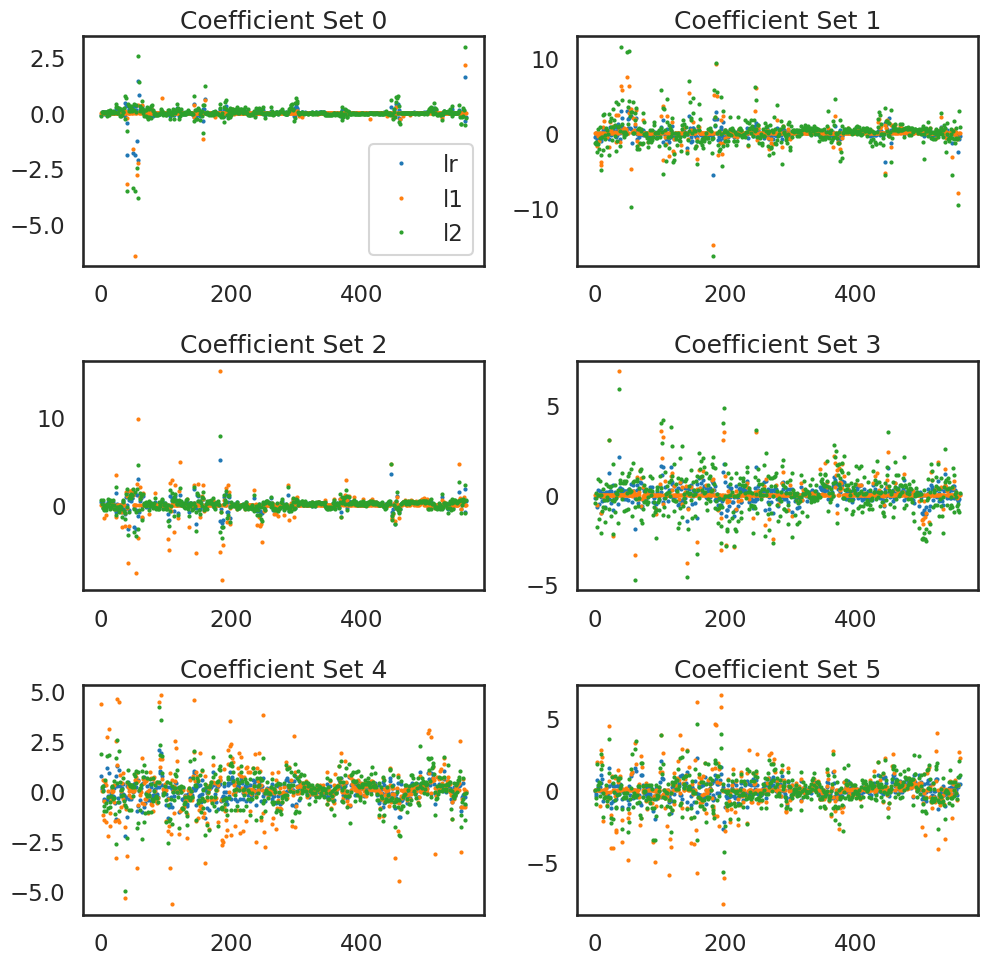

In [36]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
    
    ax.set(title=f"Coefficient Set {loc}")

plt.tight_layout()

## Question 6

*   Predict and store the class for each model.
*   Store the probability for the predicted class for each model.


In [61]:
test = pd.Series(range(6), name='hello')
test1 = pd.Series(range(6), name='hello 2')
test2 = pd.Series(range(6), name='hello 3')

In [65]:
y_pred = list()
y_prob = list()

for label, model in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(model.predict(X_test), name=label))
    y_prob.append(pd.Series(model.predict_proba(X_test).max(axis=1), name=label))

In [67]:
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

In [68]:
y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [54]:
y_prob.head()

,lr,lr,lr
0,0.998939,0.998972,0.999757
1,0.988165,0.999452,0.999489
2,0.987592,0.995623,0.999657
3,0.981381,0.999167,0.994339
4,0.998277,0.999922,0.999997


## Question 7

For each model, calculate the following error metrics:

*   Accuracy
*   Precision
*   Recall
*   F-score
*   Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

In [70]:
metrics = list()
cm = dict()

for lab in coeff_labels:
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    accuracy = accuracy_score(y_test, y_pred[lab])
    auc = roc_auc_score(label_binarize(y_test, classes=range(6)),
                        label_binarize(y_pred[lab], classes=range(6)),
                        average='weighted')
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    metrics.append(pd.Series({
        'precision': precision,
        'recall': recall,
        'fscore': fscore,
        'accuracy': accuracy,
        'auc': auc
    }, name=lab))

metrics = pd.concat(metrics, axis=1)

In [71]:
metrics

,lr,l1,l2
precision,0.984144,0.983514,0.983824
recall,0.984142,0.983495,0.983819
fscore,0.984143,0.983492,0.983819
accuracy,0.984142,0.983495,0.983819
auc,0.990384,0.989949,0.990165


## Question 8

*   Display or plot the confusion matrix for each model.


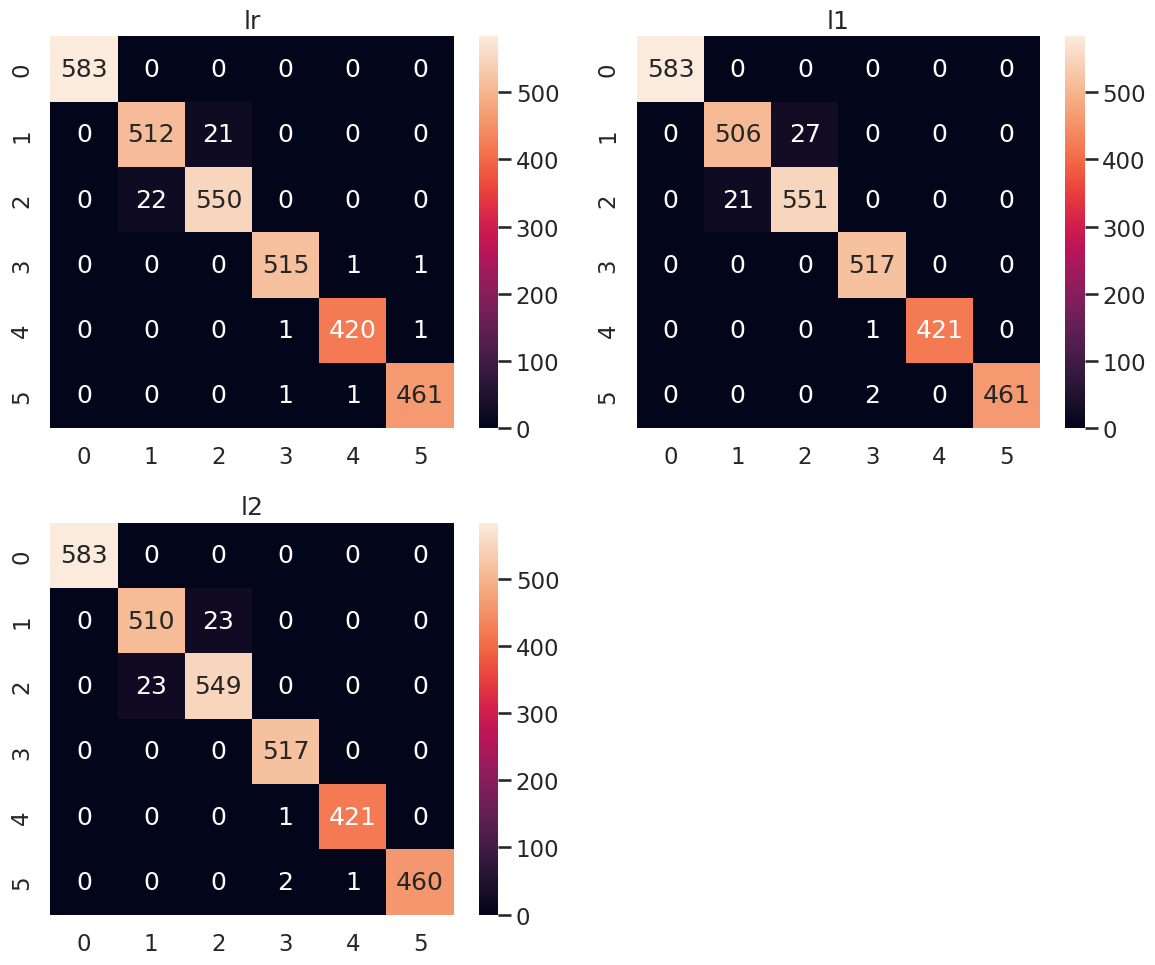

In [72]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)
axList[-1].axis('off')

for ax, lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d')
    ax.set(title=lab)

plt.tight_layout()